In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, stats

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('../Assignment 4/melbourne-housing-market/Melbourne_housing_FULL.csv')
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    display(data)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

There is something wrong with data types:

- Postcode is considered as a float while it's clearly a category.

- Change Bathroom and Car to integer Series

- Yearbuilt should be an integer

- Propertycount is a category

In [4]:
# change Postcode

data['Postcode']= data['Postcode'].astype('object')

# change Propertycount to category

data['Propertycount']= data['Propertycount'].astype('object')

# Check missing values

In [5]:
# Check features have missing values

data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

We see that BuildingArea and YearBuilt have missing values a large (60 - 70 percent), so I will drop 2 this columns.

Many of the variables suffer from missing values. Landsize is the most affected by them. I would like to explore it's relationship with price and at the same time evaluate whether it is better to impute the missing values with their mean or median.

In [6]:
# drop BuildingArea & YearBuilt

data = data.drop(['BuildingArea', 'YearBuilt'], axis=1)

In [7]:
price_mean = data['Price'].fillna(data['Price'].mean())
land_mean = data['Landsize'].fillna(data['Landsize'].mean())

price_median = data['Price'].fillna(data['Price'].median())
land_median = data['Landsize'].fillna(data['Landsize'].median())

miss_price_land = data['Price'].isnull() | data['Landsize'].isnull()

Text(0, 0.5, 'Price')

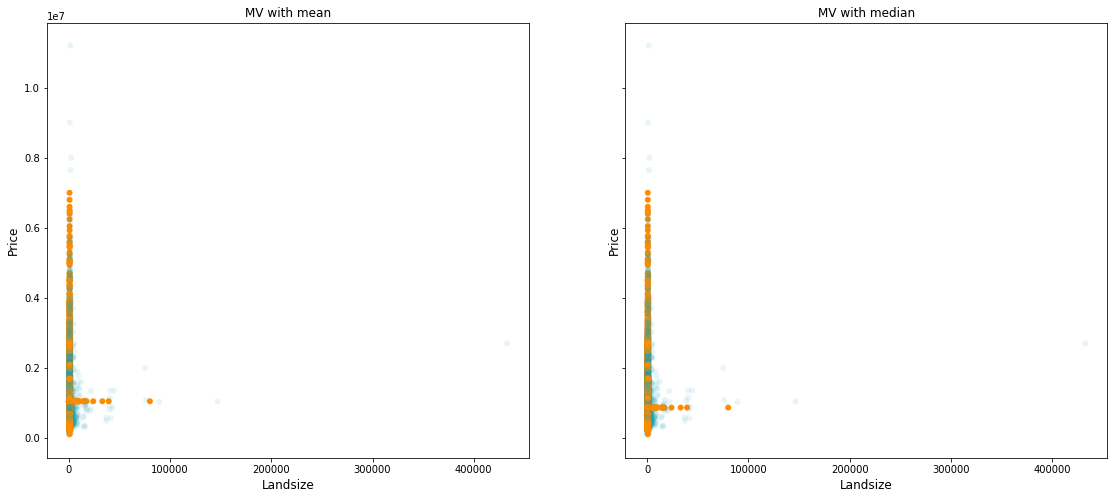

In [8]:
# create a dictionary to indicate different colors, missing values will be orange
colorChoiceDict = {True: (1.0, 0.55, 0.0, 1.0), False: (0.11, 0.65, 0.72, 0.1)}

# create a column with color values using list comprehension
colorCol = [colorChoiceDict[val] for val in miss_price_land]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(19, 8))
ax1.scatter(land_mean, price_mean, c=colorCol, linewidth=0)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.set_title('MV with mean', fontsize=12)
ax1.set_xlabel('Landsize', fontsize=12)
ax1.set_ylabel('Price', fontsize=12)

ax2.scatter(land_median, price_median, c=colorCol, linewidth=0)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.set_title('MV with median', fontsize=12)
ax2.set_xlabel('Landsize', fontsize=12)
ax2.set_ylabel('Price', fontsize=12)

There is not a striking visual difference between the two graphs. However, Price has a lot of outliers, and the median is less affected by them, as the horizontal line in the graph on the right is lower. In any case, considering the heavy presence of outliers, I think that in both cases it would be better to use the median, as the mean values are more sensitive to outliers.

In [9]:
data['Price']= data['Price'].fillna(data['Price'].median())
data['Landsize']= data['Landsize'].fillna(data['Landsize'].median())

#Similarly, fill the only missing value of  all the other numeric values

data['Distance'] = data['Distance'].fillna(data['Distance'].median())
data['Lattitude']= data['Lattitude'].fillna(data['Lattitude'].median())
data['Longtitude']= data['Longtitude'].fillna(data['Longtitude'].median())
data['Bedroom2']= data['Bedroom2'].fillna(data['Bedroom2'].median())
data['Bathroom']= data['Bathroom'].fillna(data['Bathroom'].median())
data['Car']= data['Car'].fillna(data['Car'].median())
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         1
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    3
dtype: int64

In [10]:
data['CouncilArea']= data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])
data['Regionname']= data['Regionname'].fillna(data['Regionname'].mode()[0])
data['Propertycount']= data['Propertycount'].fillna(data['Propertycount'].mode()[0])
data['Postcode']= data['Postcode'].fillna(data['Postcode'].mode()[0])
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [11]:
data['Bathroom'] = pd.to_numeric(data['Bathroom']).round(0).astype(int)
data['Car'] = pd.to_numeric(data['Car']).round(0).astype(int)

In [12]:
display(data.describe(percentiles=[0.01, 0.75, 0.99]))

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
count,34857.000000,3.485700e+04,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000,34857.000000
mean,3.031012,1.010838e+06,11.184904,3116.061623,3.064693,1.713343,1.796741,569.001520,-37.809940,145.003212,7574.099865
std,0.969933,5.719992e+05,6.788797,109.022583,0.858090,0.652754,0.882969,2763.907731,0.079290,0.105558,4429.825107
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,83.000000
1%,1.000000,3.200000e+05,1.600000,3006.000000,1.000000,1.000000,0.000000,0.000000,-38.051940,144.663126,881.880000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.150000e+06,14.000000,3156.000000,3.000000,2.000000,2.000000,598.000000,-37.770900,145.051750,10412.000000
99%,5.000000,3.225000e+06,35.400000,3754.000000,5.000000,4.000000,5.000000,2030.760000,-37.592891,145.280404,21650.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,-37.390200,145.526350,21650.000000


There are some strange values in this table, so let's check this values before moving on:

-  Check number of Bedrooms

- Check number of bathrooms (<1 and >7)

- Landsize

##### Rooms and BedRoom2

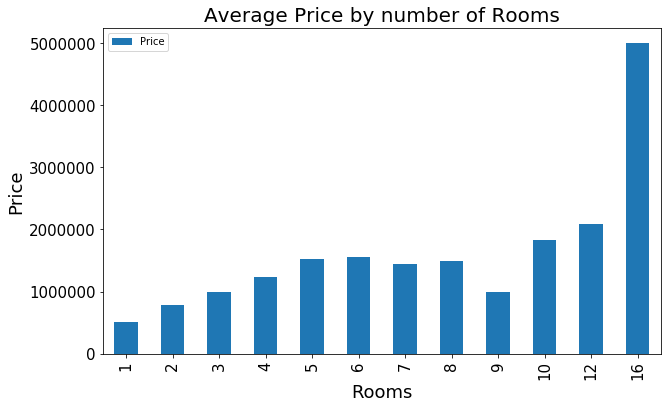

Price of the house increases with the number of rooms in the house.


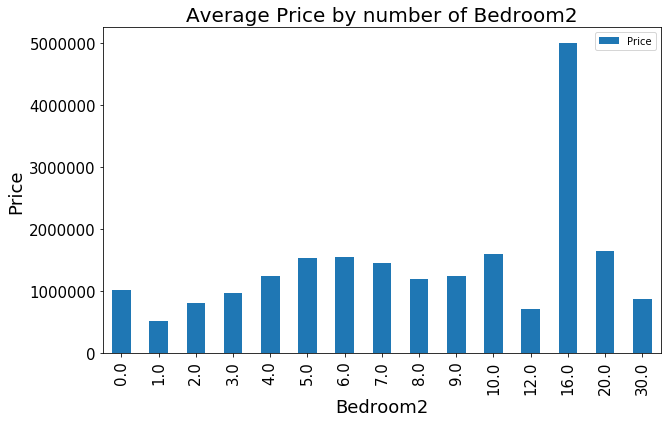

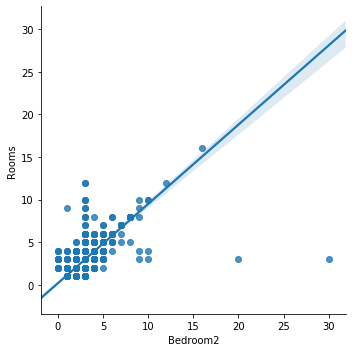

In [13]:
data[['Rooms', 'Price']].groupby('Rooms').agg({'Price': lambda x: x.mean(skipna=True)}).reset_index().plot(kind='bar', x='Rooms', y='Price', figsize=(10,6))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Rooms', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Average Price by number of Rooms', fontsize=20)
plt.show()
print('Price of the house increases with the number of rooms in the house.')

data[['Bedroom2', 'Price']].groupby('Bedroom2').agg({'Price': lambda x: x.mean(skipna=True)}).reset_index().plot(kind='bar', x='Bedroom2', y='Price', figsize=(10,6))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Bedroom2', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Average Price by number of Bedroom2', fontsize=20)
plt.show()

sns.lmplot(data= data, x='Bedroom2', y='Rooms')

From a quick view of the database, it seems to be very similar to Number of Rooms. Let's check it with a simple scatterplot: as you can see above the relationship is almost perfectly linear, which tells me that they are almost a perfect match. I do not think that the variable provides additional information that Rooms.

In [14]:
# drop Bedroom2

data= data.drop(['Bedroom2'], axis=1)

##### Bathroom

In [15]:
data['Bathroom'].value_counts()

2     19290
1     12969
3      2181
4       269
5        77
0        46
6        16
7         4
8         3
12        1
9         1
Name: Bathroom, dtype: int64

It seems that 46 housing do not have the bathroom! I think they should be old houses with a common bathroom outside, or something like that, so I will restrain myself from considering them an error

##### Landsize

In [16]:
data = data[~(data['Landsize'] < 1)]  

# Outlier

In [17]:
def out_iqr(s, k=1.5, return_thresholds=False):
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

In [18]:
data = data.drop(data[out_iqr(data['Price'])].index.tolist())
data = data.drop(data[out_iqr(data['Distance'])].index.tolist())
data = data.drop(data[out_iqr(data['Bathroom'])].index.tolist())
data = data.drop(data[out_iqr(data['Bathroom'])].index.tolist())
data = data.drop(data[out_iqr(data['Car'])].index.tolist())
data = data.drop(data[out_iqr(data['Landsize'])].index.tolist())

data.shape

(24057, 18)

# EDA

##### Suburb and Price

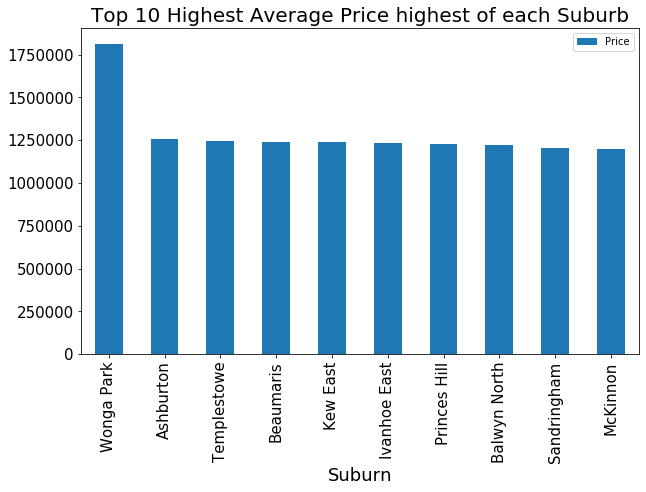

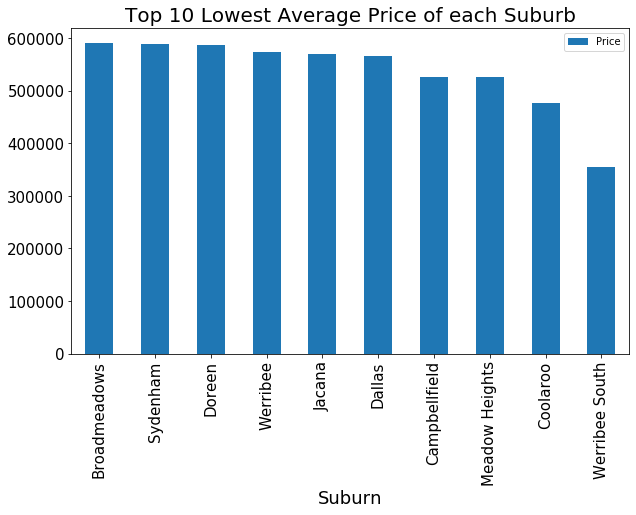

In [19]:
# groupby Price order to Suburb

suburb_price = data[['Suburb', 'Price']].groupby('Suburb').agg({'Price': lambda x: x.mean(skipna=True)}).sort_values(by='Price', ascending=False).reset_index()

suburb_price.head(10).plot(kind='bar', x = 'Suburb', y = 'Price', figsize=(10,6))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Suburn', fontsize=18)
plt.title('Top 10 Highest Average Price highest of each Suburb', fontsize=20)
plt.show()

suburb_price.dropna().tail(10).plot(kind='bar', x = 'Suburb', y = 'Price', figsize=(10,6))
plt.tick_params(axis='both', which='major', labelsize=15)
plt.xlabel('Suburn', fontsize=18)
plt.title('Top 10 Lowest Average Price of each Suburb', fontsize=20)
plt.show()

(144.61119, 145.32424, -38.0311, -37.53622)

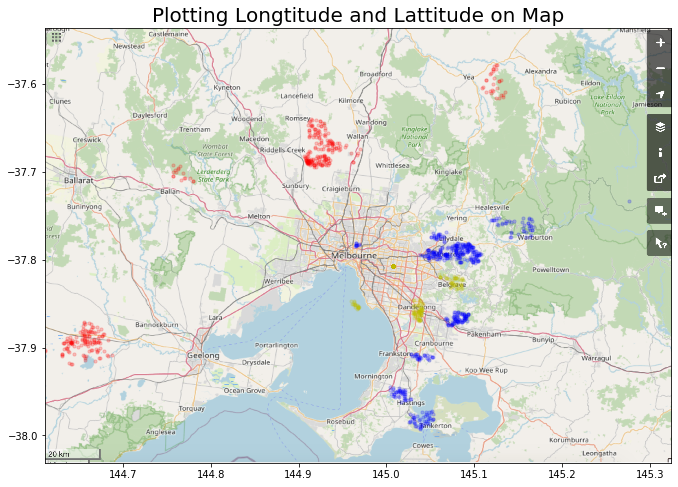

In [20]:
# show min & max of longtitude and lattitude

BBox = ((data.Longtitude.min(),   data.Longtitude.max(),      
         data.Lattitude.min(), data.Lattitude.max()))
display(BBox)

# load map image (https://www.openstreetmap.org/)

ruh_m = plt.imread('map.png')

fig, ax = plt.subplots(figsize = (15,8))
ax.scatter(data[data['Suburb'].isin(suburb_price['Suburb'].head(10).tolist())].Longtitude,
           data[data['Suburb'].isin(suburb_price['Suburb'].head(10).tolist())].Lattitude, zorder=1, alpha= 0.2, c='b', s=10)

ax.scatter(data[data['Suburb'].isin(suburb_price.dropna()['Suburb'].tail(10).tolist())].Longtitude,
           data[data['Suburb'].isin(suburb_price.dropna()['Suburb'].tail(10).tolist())].Lattitude, zorder=1, alpha= 0.2, c='r', s=10)

ax.scatter(data[data['Suburb'].isin(['Canterbury', 'Middle Park', 'Malvern'])].Longtitude,
           data[data['Suburb'].isin(['Canterbury', 'Middle Park', 'Malvern'])].Lattitude, zorder=1, alpha= 0.2, c='y', s=10)

ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.tick_params(axis='both', which='major', labelsize=10)
plt.title('Plotting Longtitude and Lattitude on Map', fontsize=20)
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

##### Distance

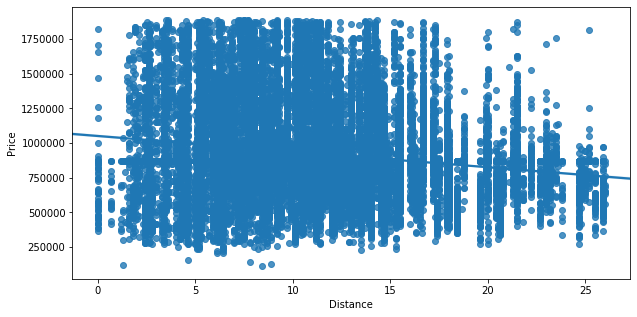

In [21]:
plt.figure(figsize=(10,5))
sns.regplot(data= data, x='Distance', y='Price')

##### Date & Price

In [22]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")

In [23]:
# calculate day of year

data['Day'] = data['Date'].dt.dayofyear
# Create year

data['Year'] = data['Date'].dt.year

#to divide by season it's better to use the day of the year instead of the month

data['season'] = 0
data['season'][data['Day'].isin(range(1, 80))] = 'winter'
data['season'][data['Day'].isin(range(80, 172))] = 'spring'
data['season'][data['Day'].isin(range(172, 264))] = 'summer'
data['season'][data['Day'].isin(range(264, 355))] = 'fall'

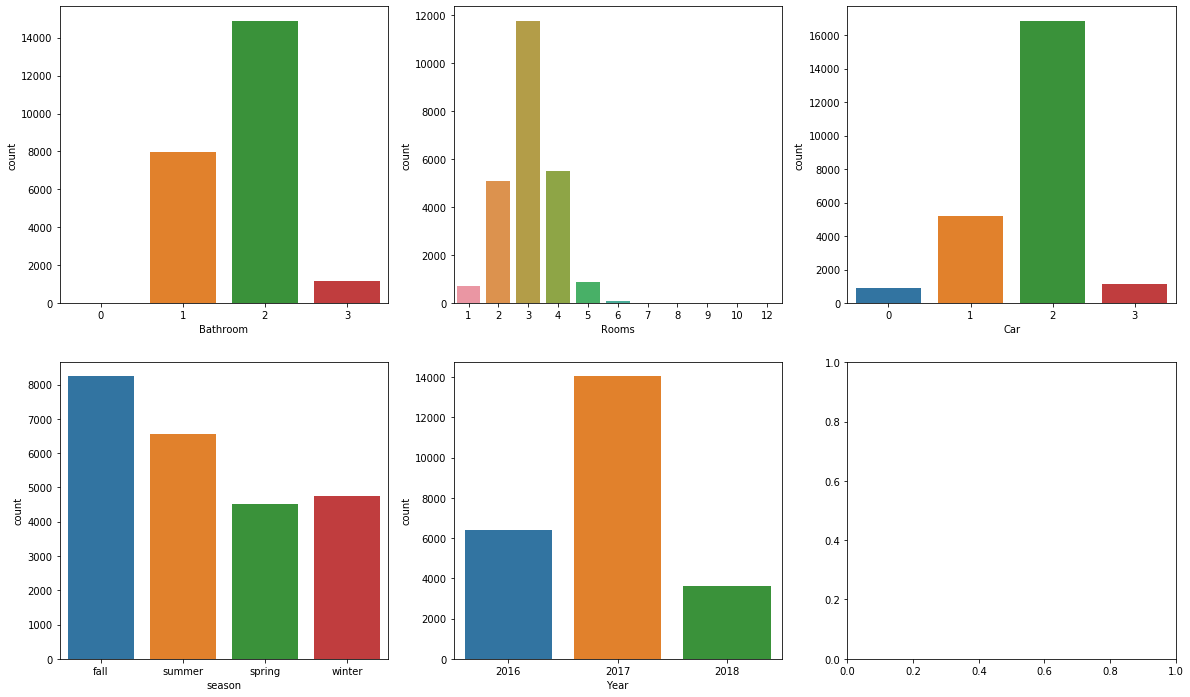

In [24]:
l= ['Bathroom', 'Rooms', 'Car', 'season', 'Year']
f, axes = plt.subplots(2, 3, figsize=(20,12))
sns.countplot(x='Bathroom', data=data, ax=axes[0,0])
sns.countplot(x='Rooms', data=data, ax=axes[0,1])
sns.countplot(x='Car', data=data, ax=axes[0,2])
sns.countplot(x='season', data=data, ax=axes[1,0])
sns.countplot(x='Year', data=data, ax=axes[1,1])

- Most properties were sold on 2017
- More properties are sold during summer and fall
- Most houses have space for 2 cars
- Between 2 to 4 rooms and 1 or 2 bathrooms

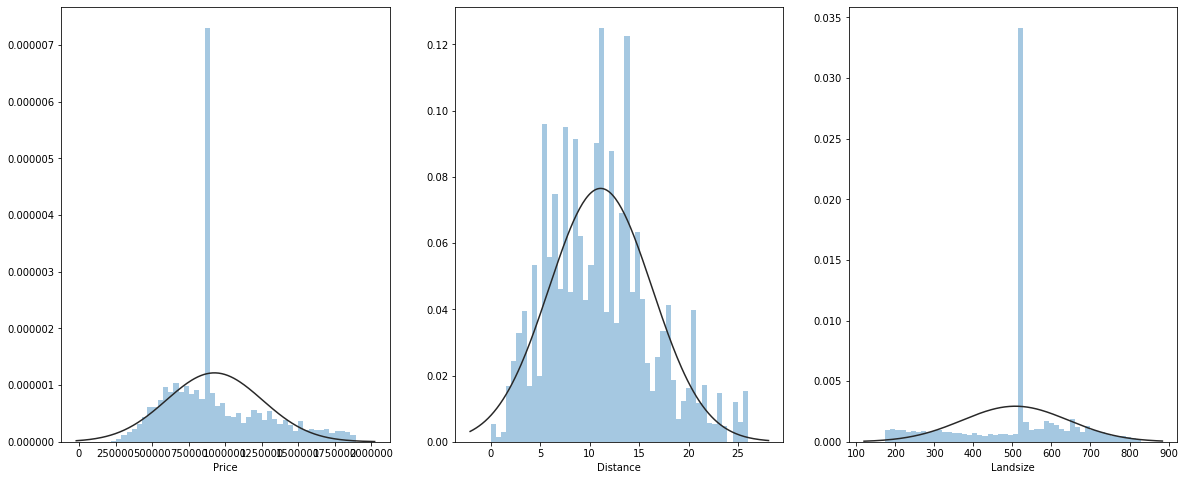

In [25]:
l= [data['Price'], data['Distance'], data['Landsize']]
f, axes = plt.subplots(1, 3, figsize=(20,8))
j = 0
for i in l:
    sns.distplot(i, fit=norm, kde=False, ax=axes[j])
    j += 1

Now let us check some variables that may influence our dependent variable price.

Text(0.5, 1.0, 'Rooms & Price')

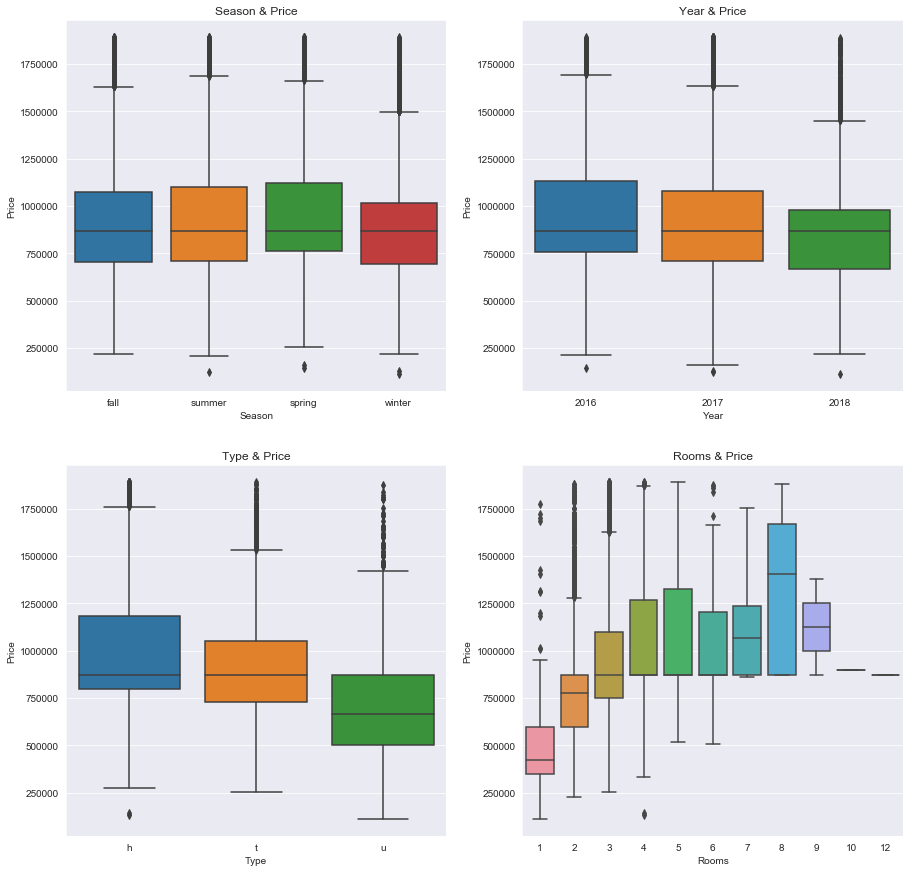

In [26]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = data, x = 'season', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Season & Price')

# Plot [0,1]
sns.boxplot(data = data, x = 'Year', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Year & Price')

# Plot [1,0]
sns.boxplot(x = 'Type', y = 'Price', data = data, ax = axes[1,0])
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Type & Price')

# Plot [1,1]
sns.boxplot(x = 'Rooms', y = 'Price', data = data, ax = axes[1,1])
axes[1,1].set_xlabel('Rooms')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Rooms & Price')

Regarding season, there is no big diffence in price between houses sold on different parts of the year.

As for years, 2017 was the best year for the market, with apparently more high price outliers. 2018 has less activity, perhaps because data collection did not include the whole year.

It seems that there is a slight linear increase in Price for more rooms. Note that not all the levels of variable rooms are very stable, with 9 and 12 showing very little variability (they surely have few cases).

Type of house may be an important indicator for price, as is seems that h (cottages) cost more, and have more variability in price.


##### Correlation matrix

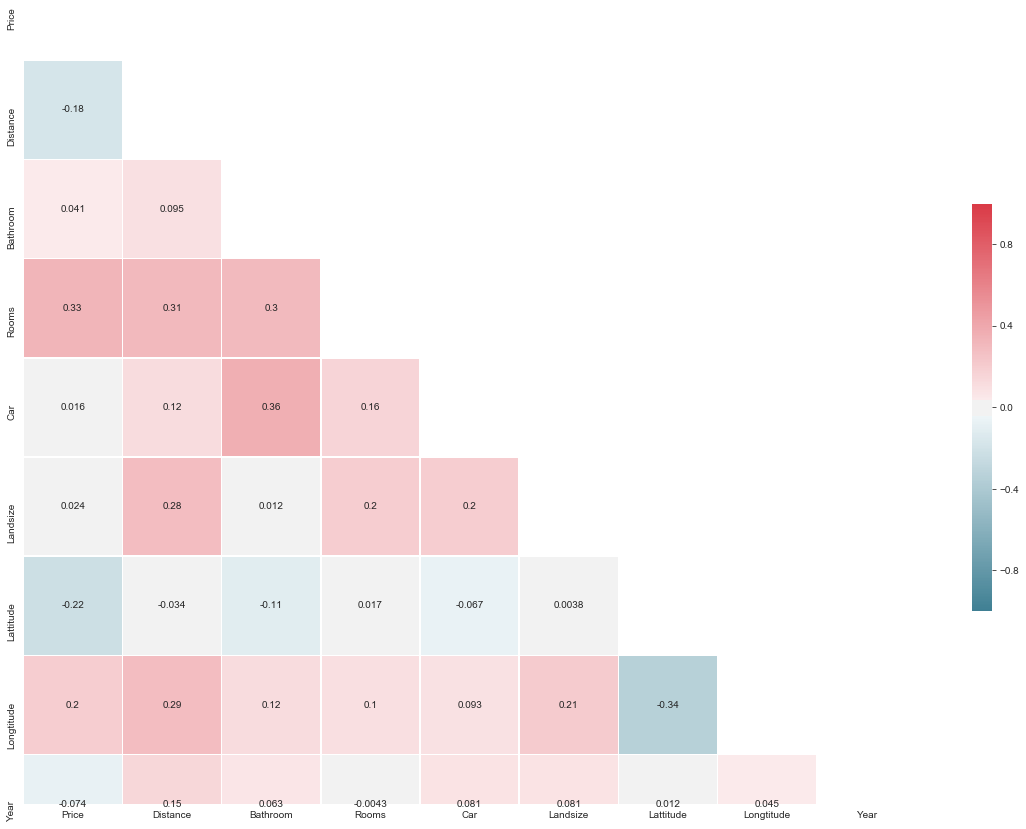

In [27]:
#select only the data we are interested in
attributes= ['Price', 'Distance', 'Bathroom', 'Rooms', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'Year']
h= data[attributes]

#whitegrid
sns.set_style('whitegrid')
#compute correlation matrix...
corr_matrix=h.corr(method='spearman')
#...and show it with a heatmap
#first define the dimension
plt.figure(figsize=(20,15))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature Engineering

In [28]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Day,Year,season
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,...,1,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,338,2016,fall
7,Abbotsford,16 Maugie St,4,h,870000.0,SN,Nelson,2016-08-06,2.5,3067.0,...,2,400.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0,219,2016,summer
8,Abbotsford,53 Turner St,2,h,870000.0,S,Biggin,2016-08-06,2.5,3067.0,...,2,201.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0,219,2016,summer
9,Abbotsford,99 Turner St,2,h,870000.0,S,Collins,2016-08-06,2.5,3067.0,...,1,202.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0,219,2016,summer
10,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016-05-07,2.5,3067.0,...,0,181.0,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019.0,128,2016,spring


In [29]:
data = data.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea','Lattitude', 'Longtitude', 'Propertycount'], axis=1)

In [30]:
data['Type'] = data['Type'].replace('h', 3)
data['Type'] = data['Type'].replace('t', 2)
data['Type'] = data['Type'].replace('u', 1)

In [31]:
data = pd.get_dummies(data, columns= ['Regionname', 'season'])

In [32]:
display(data.shape)

data.info()

(24057, 20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24057 entries, 1 to 34856
Data columns (total 20 columns):
Rooms                                    24057 non-null int64
Type                                     24057 non-null int64
Price                                    24057 non-null float64
Distance                                 24057 non-null float64
Bathroom                                 24057 non-null int64
Car                                      24057 non-null int64
Landsize                                 24057 non-null float64
Day                                      24057 non-null int64
Year                                     24057 non-null int64
Regionname_Eastern Metropolitan          24057 non-null uint8
Regionname_Eastern Victoria              24057 non-null uint8
Regionname_Northern Metropolitan         24057 non-null uint8
Regionname_Northern Victoria             24057 non-null uint8
Regionname_South-Eastern Metropolitan    24057 non-null uint8
Regionname_Southe

# Machine Learning

### Cross_validation

In [33]:
#transform to array size
#feature scaling

scaler = RobustScaler()

data_scale = scaler.fit_transform(data)
data_scale = pd.DataFrame(data_scale, columns=data.columns.tolist())

In [34]:
#create x and y variables

X = data_scale.drop("Price", axis=1)
y = data_scale["Price"].copy()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
LR = LinearRegression()
results = []
kfold = KFold(n_splits=5, random_state=42)
cv_result = cross_val_score(LR, X_train, y_train, cv = kfold)
results.append(cv_result)
print(results)

[array([0.3534125 , 0.36483006, 0.35980136, 0.36753145, 0.37827226])]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



In [37]:
LR = LinearRegression()
LR.fit(X_train,y_train)
predictions = LR.predict(X_test)
print('MSE:', mean_squared_error(y_test, predictions))

MSE: 0.5294298517752828


### PCA

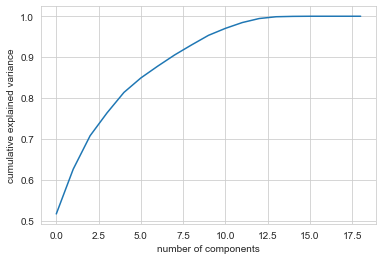

In [43]:
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [44]:
pca = PCA(n_components = 11)

X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 

In [45]:
LR = LinearRegression()
LR.fit(X_train_pca,y_train)
predictions = LR.predict(X_test_pca)
print('MSE:', mean_squared_error(y_test, predictions))

MSE: 0.5583635625623289
